<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/kfq2023_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%8F%89%EA%B0%80_%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.base import BaseEstimator
import numpy as np

In [2]:
class MYDummyClassifier(BaseEstimator):
  def fit(self,x,y=None):
    pass
  def predict(self,x):
    pred = np.zeros((x.shape[0],1))
    for i in range(x.shape[0]):
      if x['Sex'].iloc[i] == 0:
        pred[i]=0
      else:
        pred[i]=1
    return pred

In [3]:
import pandas as pd

In [4]:
path = '/content/drive/MyDrive/mldata/train_titanic.csv'
df = pd.read_csv(path)

In [5]:
label = df['Survived']
data = df[['Pclass','Sex','SibSp','Parch','Fare']]

In [6]:
data['Sex'] = pd.get_dummies(data['Sex'])['female'].values

<ipython-input-6-bb01d747e6f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = pd.get_dummies(data['Sex'])['female'].values


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data,label)

In [9]:
model = MYDummyClassifier()
model.fit(x_train,y_train)

In [10]:
pred = model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test,pred)

0.7937219730941704

In [13]:
from sklearn.datasets import load_digits

In [14]:
digits = load_digits()

In [15]:
np.unique(digits.target,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [16]:
data = digits.data
label = (digits.target==7).astype(int)

In [17]:
np.unique(label,return_counts=True)

(array([0, 1]), array([1618,  179]))

In [18]:
class MySecondClassifier(BaseEstimator):
  def fit(self,x,y=None):
    pass
  def predict(self,x):
    return np.zeros((len(x),1),dtype=bool)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data,label)

In [20]:
model = MySecondClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.9111111111111111

In [21]:
d = data[0].reshape(8,-1)
d

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [22]:
for y in range(8):
  for x in range(8):
    if d[y][x] !=0:
      print("■",end="")
    else:
      print("  ",end="")
  print()

    ■■■■    
    ■■■■■  
  ■■■  ■■  
  ■■    ■■  
  ■■    ■■  
  ■■  ■■■  
  ■■■■■    
    ■■■      


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test,pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9911111111111112

## 오차 행렬

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
confusion_matrix(y_test,pred) #로지스틱 회귀 모델로 실행한 결과

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[406,   4],
       [  0,  40]])

In [27]:
model = MySecondClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
confusion_matrix(y_test,pred)

array([[410,   0],
       [ 40,   0]])

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [29]:
def model_evaluate(actual , pred, print_flag=True):
  confusion = confusion_matrix(actual , pred)
  accuracy = accuracy_score(actual , pred)
  precision = precision_score(actual , pred)
  recall = recall_score(actual , pred)
  if print_flag:
    print(f"accuracy:{accuracy:.3f} ")
    print(f"precision:{precision:.3f} ")
    print(f"recall:{recall:.3f} ")
  return  confusion,accuracy,precision, recall

In [30]:
model = MySecondClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [31]:
model_evaluate(y_test,pred)

accuracy:0.911 
precision:0.000 
recall:0.000 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([[410,   0],
        [ 40,   0]]),
 0.9111111111111111,
 0.0,
 0.0)

In [32]:
_,acc,_,_ = model_evaluate(y_test,pred,print_flag=False)
acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9111111111111111

In [33]:
label = df['Survived']
data = df[['Pclass','Sex','SibSp','Parch','Fare']]
data['Sex'] = pd.get_dummies(data['Sex'])['female'].values

<ipython-input-33-03841b96478e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = pd.get_dummies(data['Sex'])['female'].values


In [34]:
x_train, x_test, y_train, y_test = train_test_split(data,label)

In [35]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
re = model_evaluate(y_test,pred)

accuracy:0.807 
precision:0.824 
recall:0.644 


In [36]:
model = MYDummyClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
re = model_evaluate(y_test,pred)

accuracy:0.807 
precision:0.806 
recall:0.667 


In [37]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred_proba = model.predict_proba(x_test)
pred_proba.shape

(223, 2)

In [38]:
pred_proba[0], pred[0]

(array([0.83184699, 0.16815301]), array([0.]))

In [39]:
from sklearn.preprocessing import Binarizer

In [40]:
x = [[1,2,1],
     [4,0,2],
     [1,2,3]]
binar = Binarizer(threshold=2)
bx = binar.fit_transform(x)
bx

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [ ]:
binar = Binarizer(threshold=0.3)
ppx = binar.fit_transform(pred_proba)
ppx

In [42]:
ct = 0.5
pp1 = pred_proba[:,1].reshape(-1,1)
bn = Binarizer(threshold=ct)
cp = bn.fit_transform(pp1)
d = model_evaluate(y_test,cp)

accuracy:0.807 
precision:0.824 
recall:0.644 


In [43]:
ct = 0.4
pp1 = pred_proba[:,1].reshape(-1,1)
bn = Binarizer(threshold=ct)
cp = bn.fit_transform(pp1)
d = model_evaluate(y_test,cp)

accuracy:0.794 
precision:0.736 
recall:0.736 


In [44]:
def get_eval_by_thresholds(y_test,pred,thresholds):
  for threshold in thresholds:
    print("=== threshold:",threshold)
    bn = Binarizer(threshold=threshold)
    pv = bn.fit_transform(pred)
    model_evaluate(y_test,pv)

In [46]:
tvs = [0.4, 0.45, 0.5 ,0.55, 0.60]
get_eval_by_thresholds(y_test,pp1,tvs)

=== threshold: 0.4
accuracy:0.794 
precision:0.736 
recall:0.736 
=== threshold: 0.45
accuracy:0.803 
precision:0.795 
recall:0.667 
=== threshold: 0.5
accuracy:0.807 
precision:0.824 
recall:0.644 
=== threshold: 0.55
accuracy:0.812 
precision:0.857 
recall:0.621 
=== threshold: 0.6
accuracy:0.780 
precision:0.839 
recall:0.540 


In [61]:
path = '/content/drive/MyDrive/mldata/train_titanic.csv'
df = pd.read_csv(path)
label = df['Survived']
data = df[['Pclass','Sex','SibSp','Parch','Fare']]
data['Sex'] = pd.get_dummies(data['Sex'])['female']
x_train, x_test, y_train, y_test = train_test_split(data,label)

<ipython-input-61-a3d41df6e99b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = pd.get_dummies(data['Sex'])['female']


In [62]:
from sklearn.metrics import precision_recall_curve

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
pp1 = model.predict_proba(x_test)
ppc1 = pp1[:,1]
ppc1

In [67]:
prec, rec, thres = precision_recall_curve(y_test,ppc1)

In [73]:
ti = np.arange(0,thres.shape[0],15)
ti

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150])

In [78]:
for i in ti:
  print(f"th:{thres[i]:.2f} {prec[i]:.2f} {rec[i]:.2f} ")
print("threshold:",np.round(thres[ti],2))
print("precison:",np.round(prec[ti],2))
print("recall:",np.round(rec[ti],2))

th:0.02 0.36 1.00 
th:0.10 0.38 0.95 
th:0.12 0.42 0.93 
th:0.12 0.52 0.89 
th:0.23 0.57 0.85 
th:0.42 0.68 0.78 
th:0.57 0.78 0.72 
th:0.64 0.83 0.56 
th:0.76 0.95 0.44 
th:0.91 0.90 0.23 
th:0.94 1.00 0.05 
threshold: [0.02 0.1  0.12 0.12 0.23 0.42 0.57 0.64 0.76 0.91 0.94]
precison: [0.36 0.38 0.42 0.52 0.57 0.68 0.78 0.83 0.95 0.9  1.  ]
recall: [1.   0.95 0.93 0.89 0.85 0.78 0.72 0.56 0.44 0.23 0.05]


In [83]:
import matplotlib.pyplot as plt

In [84]:
last = thres.shape[0]
last

154

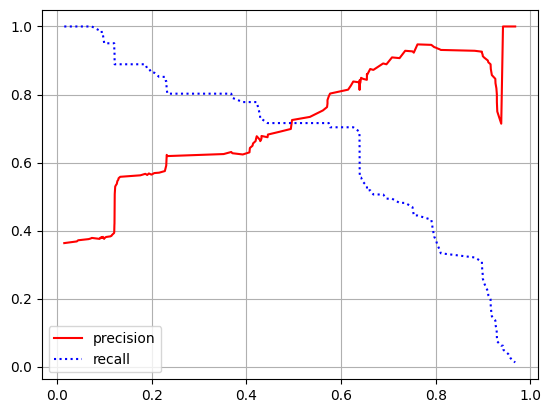

In [85]:
plt.plot(thres,prec[:last],'r-',label='precision')
plt.plot(thres,rec[:last],'b:',label='recall')
plt.grid()
plt.legend()
plt.show()

## F1 스코어

In [86]:
from sklearn.metrics import f1_score

In [88]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
f1 = f1_score(y_test,pred)
print("f1:",f1)

f1: 0.7250000000000001


In [89]:
def get_model_eval(actual,pred):
  con = confusion_matrix(actual,pred)
  acc = accuracy_score(actual,pred)
  pre = precision_score(actual,pred)
  rec = recall_score(actual,pred)
  f1 = f1_score(actual,pred)
  print("오차 행렬\n",con)
  print(f"정확도:{acc:6.4f} 정밀도:{pre:6.4f}")
  print(f"재현율:{rec:6.4f} F1 점수:{f1:6.4f}")

In [90]:
def get_eval_by_thresholds(y_test,pred,thresholds):
  for threshold in thresholds:
    print("=== threshold:",threshold)
    bn = Binarizer(threshold=threshold)
    pv = bn.fit_transform(pred)
    get_model_eval(y_test,pv)

In [92]:
thresholds = np.arange(0,1.01,0.05)
model = LogisticRegression()
model.fit(x_train,y_train)
pp1 = model.predict_proba(x_test)[:,1].reshape(-1,1)
get_eval_by_thresholds(y_test,pp1,thresholds)

=== threshold: 0.0
오차 행렬
 [[  0 142]
 [  0  81]]
정확도:0.3632 정밀도:0.3632
재현율:1.0000 F1 점수:0.5329
=== threshold: 0.05
오차 행렬
 [[  7 135]
 [  0  81]]
정확도:0.3946 정밀도:0.3750
재현율:1.0000 F1 점수:0.5455
=== threshold: 0.1
오차 행렬
 [[ 16 126]
 [  4  77]]
정확도:0.4170 정밀도:0.3793
재현율:0.9506 F1 점수:0.5423
=== threshold: 0.15000000000000002
오차 행렬
 [[86 56]
 [ 9 72]]
정확도:0.7085 정밀도:0.5625
재현율:0.8889 F1 점수:0.6890
=== threshold: 0.2
오차 행렬
 [[89 53]
 [11 70]]
정확도:0.7130 정밀도:0.5691
재현율:0.8642 F1 점수:0.6863
=== threshold: 0.25
오차 행렬
 [[103  39]
 [ 16  65]]
정확도:0.7534 정밀도:0.6250
재현율:0.8025 F1 점수:0.7027
=== threshold: 0.30000000000000004
오차 행렬
 [[103  39]
 [ 16  65]]
정확도:0.7534 정밀도:0.6250
재현율:0.8025 F1 점수:0.7027
=== threshold: 0.35000000000000003
오차 행렬
 [[103  39]
 [ 16  65]]
정확도:0.7534 정밀도:0.6250
재현율:0.8025 F1 점수:0.7027
=== threshold: 0.4
오차 행렬
 [[105  37]
 [ 18  63]]
정확도:0.7534 정밀도:0.6300
재현율:0.7778 F1 점수:0.6961
=== threshold: 0.45
오차 행렬
 [[116  26]
 [ 23  58]]
정확도:0.7803 정밀도:0.6905
재현율:0.7160 F1 점수:0.7030
=== thr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ROC CURVE

In [93]:
from sklearn.metrics import roc_curve

In [94]:
fprs, tprs, thresolds = roc_curve(y_test,pp1)

In [96]:
ti = np.arange(1,thresolds.shape[0],5)
ti

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81])

In [97]:
for i in ti:
  print(f"th:{thres[i]:.2f} {fprs[i]:.2f} {tprs[i]:.2f} ")
print("threshold:",np.round(thres[ti],2))
print("fpr:",np.round(fprs[ti],2))
print("tpr:",np.round(tprs[ti],2))

th:0.04 0.00 0.01 
th:0.07 0.01 0.38 
th:0.09 0.02 0.48 
th:0.10 0.04 0.51 
th:0.12 0.06 0.56 
th:0.12 0.08 0.64 
th:0.12 0.15 0.72 
th:0.12 0.21 0.73 
th:0.12 0.27 0.78 
th:0.12 0.34 0.84 
th:0.13 0.38 0.88 
th:0.19 0.45 0.89 
th:0.23 0.58 0.91 
th:0.37 0.73 0.93 
th:0.41 0.81 0.94 
th:0.43 0.90 0.95 
th:0.45 0.94 1.00 
threshold: [0.04 0.07 0.09 0.1  0.12 0.12 0.12 0.12 0.12 0.12 0.13 0.19 0.23 0.37
 0.41 0.43 0.45]
fpr: [0.   0.01 0.02 0.04 0.06 0.08 0.15 0.21 0.27 0.34 0.38 0.45 0.58 0.73
 0.81 0.9  0.94]
tpr: [0.01 0.38 0.48 0.51 0.56 0.64 0.72 0.73 0.78 0.84 0.88 0.89 0.91 0.93
 0.94 0.95 1.  ]


In [98]:
def roc_curve_plot(y_test,pred):
  fprs, tprs, thresolds = roc_curve(y_test,pp1)
  plt.plot(fprs,tprs,label="ROC")
  plt.plot([0,1],[0,1],'k--',label='Random')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()
  plt.show()

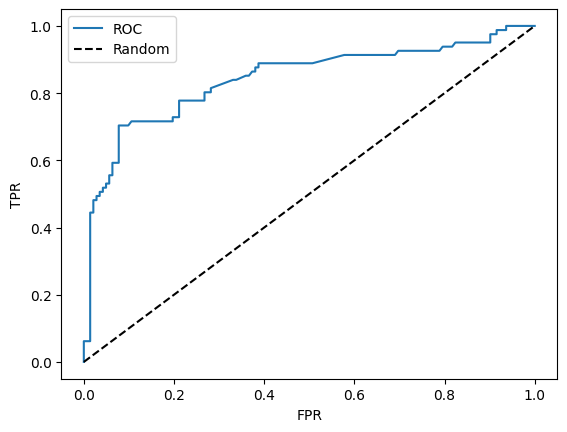

In [99]:
roc_curve_plot(y_test,pred)

In [100]:
from sklearn.metrics import roc_auc_score

In [101]:
roc_auc_score(y_test,pp1)

0.8424621804903495